# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: XX__

__Nombres de los estudiantes: Rubén Gómez, Adrián Pérez y Adrián Sanjuán__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [40]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv("calidad_vinos.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Como se puede observar en la tabla, la variable que tiene unos valores extremos más acusados con respectoa la media es
la variable "total sulfur dioxide", siendo su valor máximo de 289 y su media de 46.467792. Además si nos fijamos en la desviación tipica, es de 32.9, lo que nos indica que los valores, por lo general, se alejan de la media.
La variable que más concentrada está en torno a la media es la la variable "density", ya que su valor mínimo es de 0.99 y el máximo de 1.003. La desviación típica en este caso es de 0.002, lo que indica que prácticamente todos los valores estarán entorno a la media con valores muy cercanos entre sí.

En cuanto a la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa, la variable "total sulfure dioxide", que es la de los valores más extremos, dará más facilidades a la hora de separar por hiperplanos mediante combinaciones lineales, mientras que la variable "density", al ser siempre valores muy cercanos, no será de gran utilidad a la hora de distinguir unos y otros. 

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:>

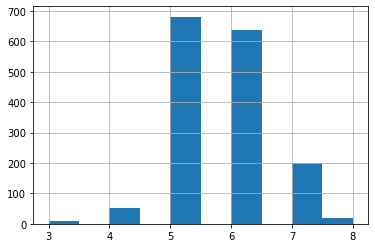

In [57]:
df.quality.hist()

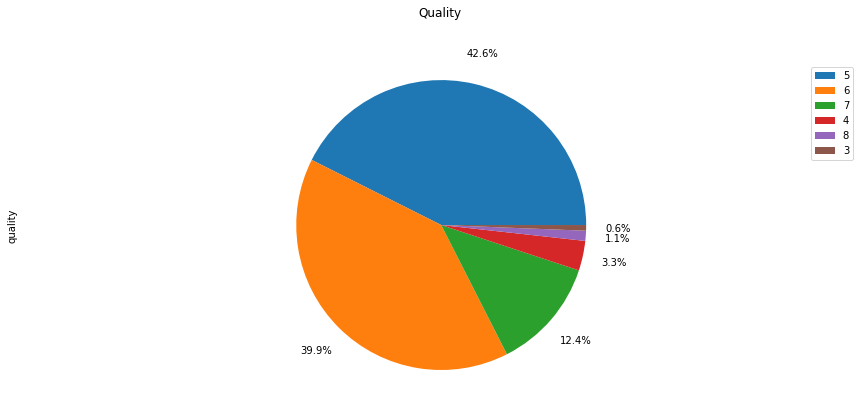

In [44]:
quality = df['quality'].value_counts()

quality.plot.pie(autopct='%1.1f%%',
                 figsize=(15, 6),
                 startangle=0,      
                 labels=None,         
                 pctdistance=1.22)
plt.title('Quality', y=1.12) 
plt.axis('equal') 

plt.legend(labels=quality.index, loc='upper right') 

Como se puede ver en el diagrama de frecuencias, más del 80% de los vinos tienen una calidad muy intermedia (5 y 6) mientras que valores un poco más destacables (por alta o baja calidad) solo ocupan un 15%.
Además, destaca que de una escala del 0 al 10, no hay valores más bajos del 3 ni mas altos que el 8, por lo que nunca se alcanzan estos extremos. Por tanto, para nuestro perceptrón, la escala de la calidad del vino será de 3 a 8 (en vez de de 0 a 10) porque es la de nuestro conjunto de entrenamiento.

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad del vino y las variables que estén más correlacionadas con esa variable (estableciendo para ello un valor umbral que consideres adecuado).

In [45]:
import seaborn as sns

In [46]:
cm = sns.light_palette("green", as_cmap=True)
corr_pr = pd.DataFrame(df.corr()['quality'])
corr_pr.style.background_gradient(cmap=cm)

,quality
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.226373
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731
sulphates,0.251397


In [47]:
corr_pr_abs = corr_pr.abs()
corr_pr_abs.sort_values(by = 'quality',ascending = False).style.background_gradient(cmap=cm)

,quality
quality,1.000000
alcohol,0.476166
volatile acidity,0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,0.185100
density,0.174919
chlorides,0.128907
fixed acidity,0.124052
pH,0.057731


In [48]:
b=corr_pr_abs.sort_values(by = 'quality',ascending = False)
corr_pr_top = b[abs(b['quality']) > 0.15]
df_corr=df[corr_pr_top['quality'].keys()]
df_corr

,quality,alcohol,volatile acidity,sulphates,citric acid,total sulfur dioxide,density
0,5,9.4,0.700,0.56,0.00,34.0,0.99780
1,5,9.8,0.880,0.68,0.00,67.0,0.99680
2,5,9.8,0.760,0.65,0.04,54.0,0.99700
3,6,9.8,0.280,0.58,0.56,60.0,0.99800
4,5,9.4,0.700,0.56,0.00,34.0,0.99780
...,...,...,...,...,...,...,...
1594,5,10.5,0.600,0.58,0.08,44.0,0.99490
1595,6,11.2,0.550,0.76,0.10,51.0,0.99512
1596,6,11.0,0.510,0.75,0.13,40.0,0.99574
1597,5,10.2,0.645,0.71,0.12,44.0,0.99547


Hemos considerado adecuado el valor umbral 0.15, ya que consideramos que una correlacion menor no es tan relevante. Consideramos que una correlacion de 0.15 tamppoco lo es, pero teniendo en cuenta que la variable con más correlación tiene un coeficiente de 0.47, un coeficiente > 0.15 será relativamente grande (un poco menos de un tercio del coeficiente más grande).

## 1
Aunque un MLP sea capaz de tratar con variables menos relevantes para el problema ya que acabará asignándoles pesos cercanos a cero, hemos decidido entrenar nuestro perceptrón con la selección de variables anterior ya que cuantas más dimensiones tenga nuestro dataset, más datos de entrenamiento serán necesarios (y no disponemos de una gran cantidad de ellos).

A partir de ahora trabajaremos con un dataset reducido a las variables con un coeficiente de correlación con quality superior a 0.15.

## 2
Un MLP sea capaz de tratar con variables menos relevantes para el problema ya que acabará asignándoles pesos cercanos a cero. Por esto hemos decidido entrenar con todas las variable en vex de con la selección hecha anteriormente.

### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


Para este problema, es conveniente normalizar los datos ya que haciéndolo disminuye el tiempo de entrenamiento y evita los mínimos locales en la optimización del error, aunque realmente no es necesario normalizar los datos.

Decidimos escalar los datos ya que las distribuciones (como se puede ver en los diagramas de abajo) no todas siguen una distribución normal.

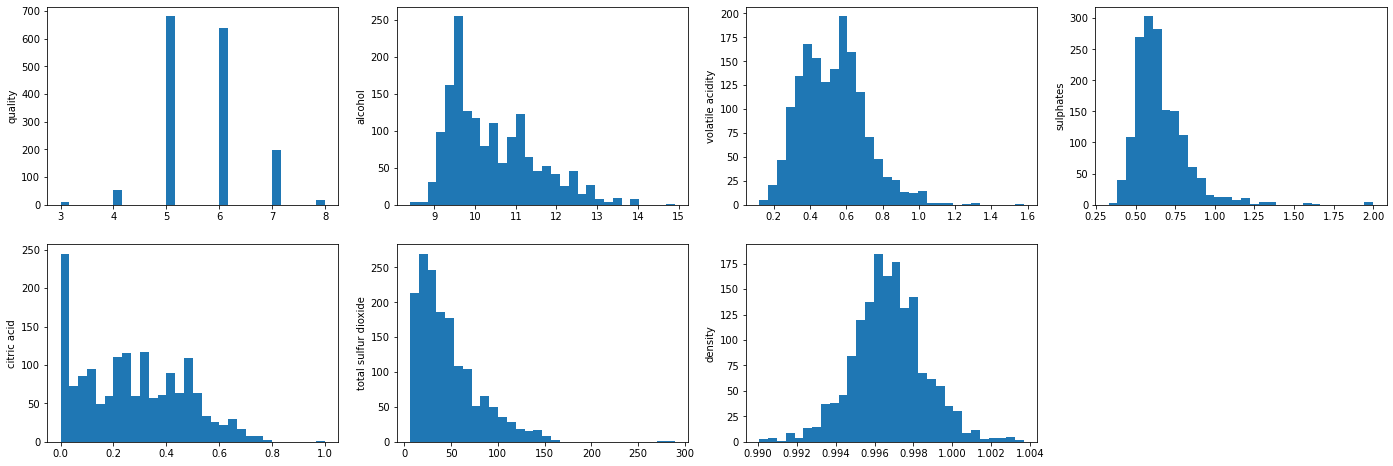

In [120]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (24, 8))
for i in range(len(df_corr.columns)):
    p = fig.add_subplot(2,4, i+1)
    df_corr[df_corr.columns[i]].plot.hist(bins = 30,ax=p)
    p.set_ylabel(df_corr.columns[i])

In [161]:
features = df.columns[:-1]
df_features = df[features]
df_target = df[df.columns[-1]]

In [162]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler_x = StandardScaler()
scaler_x.fit(df_features)
df_scaled=scaler_x.transform(df_features)

scaler_y = MinMaxScaler()
scaler_y.fit(np.array(df.quality).reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
quality_scaled=scaler_y.transform(np.array(df.quality).reshape(-1, 1))

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [163]:
RANDOM_STATE=18

In [164]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0, 2.1,step = 0.1) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    
    #Una capa oculta de 250 neuronas
    mlp=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=250, random_state=RANDOM_STATE)

    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_scaled, quality_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
print(cv_scores_mean)
print(cv_scores_std)
max_value = max(cv_scores_mean)
print('Maximum value:', max_value, "for alpha = ", cv_scores_mean.index(max_value)*0.1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[-0.019303732620826415, -0.017311673394301997, -0.016966997615647572, -0.0167967618048002, -0.016510956206935386, -0.016554296950924315, -0.018198720104254017, -0.016672331729505725, -0.016674253830115292, -0.01676842263490322, -0.016967150839909892, -0.017033103645920762, -0.01716369581932472, -0.017173790413963358, -0.017239140480320478, -0.017309549694973968, -0.01734015866030796, -0.017388993022242488, -0.017436570015531786, -0.017479931134860942, -0.017510481371302143]
[0.0009509716771580011, 0.0006497642770889536, 0.0003905181761972678, 0.0006735222821102713, 0.0006994129418978138, 0.0006493903836843872, 0.002215952772216424, 0.0005957176798667022, 0.0005649002840112696, 0.0005358596683491122, 0.0006027023950968359, 0.0005762488016391732, 0.0005051892863794514, 0.0005561851511882374, 0.0005561047507834247, 0.0005521241449457059, 0.0005731299896238048, 0.00057367966457236, 0.0005710507661471572, 0.0005734265345559892, 0.0005767135574392882]
Maximum value: -0.016510956206935386 for

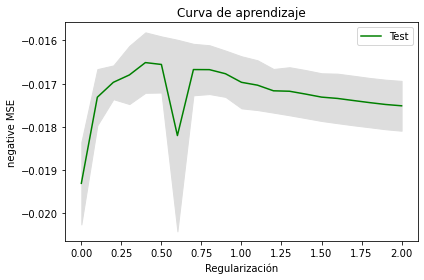

In [165]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [166]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0, 2.1,step = 0.1) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    
    #Una capa oculta de 250 neuronas
    mlp=MLPRegressor(hidden_layer_sizes=(50,150,50 ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=250, random_state=RANDOM_STATE)

    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_scaled, quality_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
print(cv_scores_mean)
print(cv_scores_std)
max_value = max(cv_scores_mean)
print('Maximum value:', max_value, "for alpha = ", cv_scores_mean.index(max_value)*0.1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neur

[-0.026370772555432555, -0.01679026715318898, -0.016333906499597706, -0.016690337311501262, -0.01698738519900412, -0.01727208462756811, -0.017552504755998875, -0.024614953628914436, -0.024245263821658505, -0.027213791241185847, -0.020232993505530955, -0.027949618303615652, -0.025076541851603944, -0.02020997859018304, -0.020445209099051526, -0.021070788752254526, -0.021936322646002752, -0.02388661190111576, -0.02467391037346838, -0.02584596583772596, -0.026228215181904897]
[0.005641161788244799, 0.000805348834501049, 0.0009579235602536745, 0.00048142036928866826, 0.0005017386797210439, 0.0005655796500020848, 0.0006451575352919615, 0.005503169492465242, 0.00476894153369293, 0.0023699987985677075, 0.004100345238569698, 0.0040403183924003485, 0.0066313984948754125, 0.0014065118254907164, 0.0011584642725936353, 0.0013463194812165563, 0.0017064413824841862, 0.004196108337663148, 0.003980090601479995, 0.0034745870270380696, 0.0027416085729165744]
Maximum value: -0.016333906499597706 for alpha

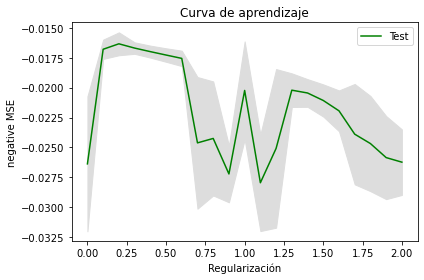

In [167]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

*Hemos decidido probar diferentes potencias negativas de 10 para establecer el coeficiente de regularización del perceptrón. Hemos probado a hacerlo (dos bloques anteriores) con valores en un rango de 0-2 con saltos de 0.1 y y nos aparece una gráfica decreciente, esto nos lleva a considerar que este parámetro se mueve en valores más pequeños que 0.1 para este problema.

In [168]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(0, 10) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    
    #Una capa oculta de 250 neuronas
    mlp=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=250, random_state=RANDOM_STATE)

    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_scaled, quality_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
print(cv_scores_mean)
print(cv_scores_std)
max_value = max(cv_scores_mean)
print('Maximum value:', max_value, "for alpha = 10 ^ -", cv_scores_mean.index(max_value))

[-0.016967150839909892, -0.017311673394301997, -0.01899151546942605, -0.019251073542027493, -0.019296628596665207, -0.019306609021771632, -0.01931953311658554, -0.01930927868847846, -0.01930365199158061, -0.019303732595372415]
[0.0006027023950968359, 0.0006497642770889536, 0.0009980133420789664, 0.0009581185858803108, 0.0009533058264317007, 0.0009271614292180996, 0.0009456003353726179, 0.0009480088316665947, 0.0009510400843880998, 0.0009509716779042703]
Maximum value: -0.016967150839909892 for alpha = 10 ^ - 0


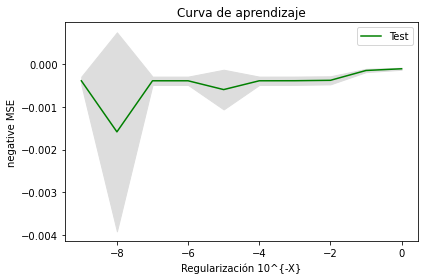

In [149]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Maximum value: -0.016731743212003006 for alpha = 10 ^ - 5

In [150]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(0, 10) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    
    #Varias capas ocultas distribuyendo 250 neuronas
    mlp=MLPRegressor(hidden_layer_sizes=(50,150,50), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=250, random_state=RANDOM_STATE)

    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_scaled, quality_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
print(cv_scores_mean)
print(cv_scores_std)
max_value = max(cv_scores_mean)
print('Maximum value:', max_value, "for alpha = 10 ^ -", cv_scores_mean.index(max_value))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[-0.001994828402056674, -7.488725111174222e-05, -0.00028979758109586886, -0.00044899716336140613, -0.00048268674230772914, -0.00048004737012247764, -0.00047528697734160327, -0.0004705413646193425, -0.0006024188317906166, -0.00047048705773492384]
[0.0014686037438578587, 3.884307177973162e-05, 6.206747655521165e-05, 9.923437898032328e-05, 0.00013047770920474733, 0.00013857195080591597, 0.00012388113880225897, 0.00012507371699467437, 0.00028380545434422493, 0.00012545629414498666]
Maximum value: -7.488725111174222e-05 for alpha = 10 ^ - 1


Después de probar difernetes configurciones con diferente número de capas hemos optado por la que menor error nos daba (50,150,50)

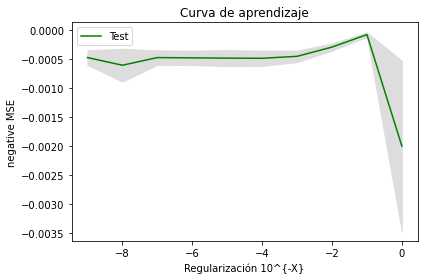

In [151]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Maximum value: -0.01665071118566968 for alpha = 10 ^ - 6

Análisis del error según el coeficiente de regularización y según la configuración de las capas intermedias:

1 capa (250): Podemos obsevar un comportamiento bastante estable para este parámetro. Parece que el mejor valor (el más cercano a cero) es con $\alpha=10^{-5}$. También se puede observar como para valores a partir de $\alpha=10^{-2}$ el error comienza a aumentar considerablemente, tendencia que se puede oservar como continua en la primera gráfica.

3 capas (50,150,50): También tiene un comportamiento estable pero se aprecian más picos que en el caso anterior, además, si nos fijamos en la desviación típica media para cada caso, también es mayor que en el de una capa. Por estas razones consideramos que tiene un comportamiento más volátil. Sin embargo, a pesar de lo anterior, en el caso mejor (para $\alpha=10^{-6}$) tiene un error menor que el perceptrón de una capa.

Según los datos obtenidos, ninguno domina sobre el otro claramente. 

Aunque sea más volátil, hemos decidido utilizar el segundo perceptrón con coeficiente de regulariación $\alpha=10^{-6}$ debido a que su error es menor.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Para ello, dibuja un diagrama de dispersión con los valores predichos por el modelo y los valores reales (la diagonal representa error 0). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.

In [156]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.4
mlp=MLPRegressor(hidden_layer_sizes=(250), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, df_scaled, quality_scaled.ravel(), cv=5)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled.reshape(1, -1))

In [157]:
errors = np.abs(np.array(df.quality) - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_quality = np.mean(df['quality'])

print('Error absoluto medio:', mean_error)
print('Desviación típica:', std_error)
print('Error absoluto medio en % sobre la media:', mean_error/mean_quality*100)
mean_quality

Error absoluto medio: 0.014453759004352786
Desviación típica: 0.020694424593880403
Error absoluto medio en % sobre la media: 0.2564531807363527


5.6360225140712945

In [158]:
# Podemos calcular el error también a partir de las métricas de sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print('MAE:', mean_absolute_error(np.array(df.quality), predicts.reshape(-1,1)))
print('RMSE:', np.sqrt(mean_squared_error(np.array(df.quality), predicts.reshape(-1,1))))
print('MAPE:', mean_absolute_percentage_error(np.array(df.quality), predicts.reshape(-1,1)))

MAE: 0.014453759004352786
RMSE: 0.02524223362992489
MAPE: 0.002748382233193857


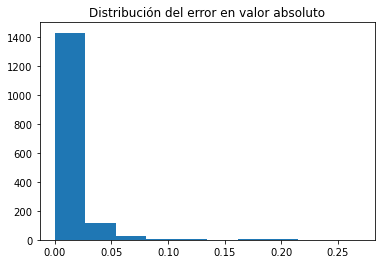

In [159]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors.reshape(-1,1))

plt.title('Distribución del error en valor absoluto')
plt.show()

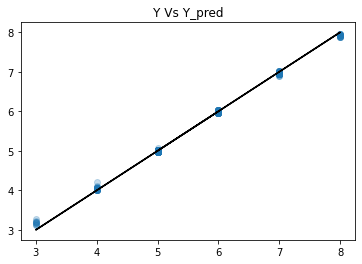

In [160]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(np.array(df.quality), predicts, alpha= 0.25) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(np.array(df.quality), np.array(df.quality), color='k') 

plt.title('Y Vs Y_pred')
plt.show()